In [48]:
import os, time, datetime, json, traceback, itertools, logging, configparser, random, ctypes, collections, copy, statistics
import pandas as pd
import numpy as np
from matplotlib import pyplot

import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
KEEP_MIN = 5

In [4]:
# def diff(data):
        
# #     _data = copy.copy(data)
# #     _data.insert(_data[0], 0)
# #     _data.pop()
    
# #     return data - _data

#     _data = []
#     for i, d in enumerate(data):
        


In [5]:
def variance(data):
    # Number of observations
    n = len(data)
    # Mean of the data
    mean = sum(data) / n
    # Square deviations
    deviations = [(x - mean) ** 2 for x in data]
    # Variance
    variance = sum(deviations) / n
    return variance

In [89]:
class MatchInfo():

    def __init__(self, name):
        self.name = name
        self.section_sec = 600 # max section time  may  10:00 or 12:00 or ...
        self.section_min = 10
        self.keep_min = KEEP_MIN
        self.datas = collections.deque([]) #, maxlen=self.keep_size)
        self.datas_keys = collections.deque([]) # , maxlen=self.keep_size)

    def add_info(self, total_sec, section_sec, one_score, two_score, one_odds, two_odds): # [10:00, 37, 42, 2.10, 1.66, +1.5, -1.5, 1200]

        if section_sec > self.section_sec: # 12
            self.section_sec = 720
            self.section_min = 12

            self.datas = collections.deque([]) #, maxlen=self.keep_size)
            self.datas_keys = collections.deque([]) # , maxlen=self.keep_size)

        if total_sec in self.datas_keys:
            self.datas.popleft()
        self.datas.appendleft([total_sec, section_sec, one_score, two_score, one_odds, two_odds])
        self.datas_keys.appendleft(total_sec)
        
        if self.keep_min > 0:
            keep_max_sec = total_sec + self.keep_min * 60
            while self.datas[-1][0] > keep_max_sec:
                self.datas.pop()

    def get_secction_min(self):
        return self.section_min

    def is_bet(self):

        scores = []
        rates = []
        for [total_sec, section_sec, one_score, two_score, one_odds, two_odds] in self.datas:
            if total_sec > 0:
                scores.append(one_score - two_score)
                rates.append(abs(one_score - two_score) * abs(one_odds - two_odds) / total_sec)
            else:
                scores.append(0)
                rates.append(0)
        scores.reverse()
        rates.reverse()
        
#         print('%s (%s, %s): %s %s' % (self.name, self.datas[0][2], self.datas[0][3], np.mean(scores), np.mean(rates)))
        
        if statistics.mean(scores) > 2 and statistics.mean(rates) > 0.03 and self.datas[0][0] < 360 and rates[-1] > 0.3:
            return True
        
        return False
        
#         return scores, rates

In [7]:
names = []
for line in open('bet.txt', encoding='utf-8'):
    name = line.split(' ', 1)[-1].split(':', 1)[0]
    names.append(name)

In [8]:
matchs = {}

In [9]:
for line in open('data.txt', encoding='utf-8'):
    team_one, team_two, section, section_time, score_one, score_two, odds_one, odds_two, handicap_one, handicap_two, total_left_sec = line.strip().split('\t')[:11]
    
    if score_one.strip() and score_two.strip() and odds_one.strip() and odds_two.strip():
        key = '%s,%s' % (team_one, team_two)

        if key in names:
            if key not in matchs:
                matchs[key] = []
            
            matchs[key].append([team_one, team_two, section, section_time, score_one, score_two, odds_one, odds_two, handicap_one, handicap_two, total_left_sec])
    

In [10]:
# *** 里瓦斯,Occidentales -215: -160  * 普洛耶什蒂,CSO沃伦塔里 ***

In [11]:
 # NU牛头犬,圣塞巴斯提安金雄鹿   

In [12]:
names

['巴亚蒙,庞塞',
 'Colegio de Abogados,Metropoli BA',
 '利昂圣多明各,Titanes del Licey',
 'Dunkin Raptors,Ban Bueng魔鬼鱼',
 '奥塔哥掘金,南部鲨鱼',
 '希诺特加布鲁玛斯,皇家埃斯特利',
 'Titanes del Licey,利昂圣多明各',
 '庞塞,巴亚蒙',
 'Universidad Crucena Santa Cruz,阿米斯塔德苏克雷',
 'Wangs-拉特朗,CEU Scorpions',
 'Szechenyi Istvan University Women,罗兹大学 女子',
 '圣道顿马士大学Growling Tigers,Marinerong Pilipino',
 '华盛顿奇异,达拉斯飞翼',
 'Plateros,墨西加利太阳',
 'Indigenas de Matagalpa,加勒比海岸',
 '洛杉矶火花,凤凰城水星',
 '维也纳大学,匈牙利体育大学',
 '富兰克林公牛,塔拉纳基山脉',
 'APEX Fuel-SSCR,拉特朗骑士',
 '阿雷西博,圣赫尔曼',
 '富尔萨雷吉亚,哈拉帕猎鹰',
 'Wangs,圣道顿马士大学Growling Tigers',
 '惠灵顿圣徒,尼尔逊巨人',
 'Olivol Mundial,Verdirrojo',
 'Lagomar,圣特尔莫RS',
 '达拉斯飞翼,芝加哥天空',
 '常轮皇后区女子,南方黄眼企鹅 女子',
 'TNT Tropang Giga,麦诺尼亚热点',
 '皮钦查·波托西,塔里哈拉萨尔',
 '塔拉纳基山脉,尼尔逊巨人',
 '皇家埃斯特利,Universidad Nacional de Ingenieria',
 'Marinerong Pilipino,CEU Scorpions',
 'CSB开拓者,UPHSD阿尔塔斯',
 '原生力啤酒,博尔特斯',
 '霍巴特电光 女子,桑德林汉姆军刀 女子',
 '罗克汉普顿气旋 女子,达尔文Salties 女子',
 'Marinos安索阿特吉,加拉加斯鳄鱼',
 '华盛顿奇异,芝加哥天空',
 'Tabare,Lagomar',
 'Club Atletico Cordon,Union Atletica',
 '

In [13]:
match_index = -10

In [14]:
# matchs[names[match_index]][-250:]

In [15]:
df = pd.DataFrame(matchs[names[match_index]], columns=['name1', 'name2', 'section', 'time', 'score1', 'score2', 'odds1', 'odds2', 'handicap1', 'handicap2', 'total_sec'])

In [16]:
df.loc[417]

name1          普洛耶什蒂
name2        CSO沃伦塔里
section          第4节
time           02:26
score1            87
score2            79
odds1           1.09
odds2           6.75
handicap1       -6.5
handicap2       +6.5
total_sec        146
Name: 417, dtype: object

In [17]:
df = df.astype({'score1': 'int64', 'score2': 'int64', 'odds1': 'float64', 'odds2': 'float64', 'handicap1': 'float64', 'handicap2': 'float64', 'total_sec': 'int64'})

In [18]:
match_info = MatchInfo(names[match_index])
for team_one, team_two, section, section_time, score_one, score_two, odds_one, odds_two, handicap_one, handicap_two, total_left_sec in matchs[names[match_index]][:417]:
    
    quarter = 0
    if section.strip() == '第4节':
        quarter = 0
    elif section.strip() == '第3节':
        quarter = 1
    elif section.strip() == '第2节':
        quarter = 2
    elif section.strip() == '第1节':
        quarter = 3
    match_time = time.strptime(section_time.strip(), '%M:%S')
    match_time_int = int(datetime.timedelta(minutes=match_time.tm_min, seconds=match_time.tm_sec).total_seconds())
    total_left_sec = match_info.get_secction_min() * quarter * 60 + match_time_int
    
#     print(total_left_sec)
    match_info.add_info(int(total_left_sec), 300, int(score_one), int(score_two), float(odds_one), float(odds_two))
    
    

In [22]:
scores, rates = match_info.is_bet()

In [23]:
np.mean(scores)

3.94

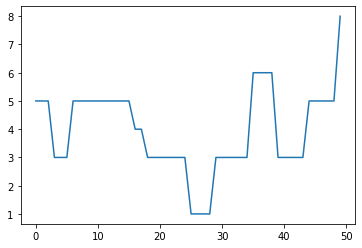

In [24]:
pyplot.plot(scores)

In [47]:

ss, rs = [], []
for name in names:
    match_info = MatchInfo(name)
    for team_one, team_two, section, section_time, score_one, score_two, odds_one, odds_two, handicap_one, handicap_two, total_left_sec in matchs[name]:
        
        if section_time and abs(float(odds_one) - float(odds_two)) > 0:
            quarter = 0
            if section.strip() == '第4节':
                quarter = 0
            elif section.strip() == '第3节':
                quarter = 1
            elif section.strip() == '第2节':
                quarter = 2
            elif section.strip() == '第1节':
                quarter = 3
            match_time = time.strptime(section_time.strip(), '%M:%S')
            match_time_int = int(datetime.timedelta(minutes=match_time.tm_min, seconds=match_time.tm_sec).total_seconds())
            total_left_sec = match_info.get_secction_min() * quarter * 60 + match_time_int

        #     print(total_left_sec)
            match_info.add_info(int(total_left_sec), 300, int(score_one), int(score_two), float(odds_one), float(odds_two))
            
#             if team_one == '力量篮球俱乐部':
#                 print(score_one, score_two)
                    
            if (abs(float(score_one) - float(score_two)) * abs(float(odds_one) - float(odds_two)) / total_left_sec) > 0.3 and total_left_sec < 360:
                break
                
#     s_m, r_m = match_info.is_bet()
#     ss.append(s_m)
#     rs.append(r_m)
#     scores, rates = match_info.is_bet()
#     print('%s: %s %s' % (name, np.mean(scores), np.mean(rates)))
    if match_info.is_bet():
        print(name)
    

d:\soft\python\python37\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

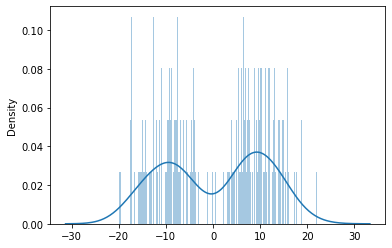

In [70]:
sns.distplot(ss, bins=220)

In [51]:
ss

[22,
 -4.280701754385965,
 4.340425531914893,
 -20,
 15.791666666666666,
 -17.275862068965516,
 -8.13953488372093,
 -9.166666666666666,
 -6.964912280701754,
 -10.862745098039216,
 -12.705882352941176,
 7.2153846153846155,
 12.046511627906977,
 -19.76923076923077,
 17.692307692307693,
 -14.842105263157896,
 15.4,
 -4.066666666666666,
 8.054794520547945,
 -6.842105263157895,
 13.11111111111111,
 -0.12903225806451613,
 9.035087719298245,
 6.923076923076923,
 15,
 10.65625,
 13,
 14.657142857142857,
 7.176470588235294,
 17.361702127659573,
 14.859649122807017,
 -7.819444444444445,
 14.265625,
 -7.4,
 -8.925,
 -17.210526315789473,
 -10,
 -10,
 9.893617021276595,
 18.944444444444443,
 -9.1875,
 9.685185185185185,
 6.482758620689655,
 10.279069767441861,
 10,
 -12,
 10.74561403508772,
 -15.944444444444445,
 -8.456521739130435,
 -15.592592592592593,
 -8.864864864864865,
 18.785714285714285,
 15.74074074074074,
 -17.34090909090909,
 -9.11111111111111,
 6.133333333333334,
 -11.75,
 11.1904761904

In [ ]:
# *** 里瓦斯,Occidentales -215: -160  * 普洛耶什蒂,CSO沃伦塔里 ***

In [91]:
match_infos = []

In [92]:
def get_match_info(name):

    for match_info in match_infos:
        if match_info.name == name:
            return match_info

    match_info = MatchInfo(name)
    match_infos.append(match_info)
    return match_info
    

In [93]:
names = []

In [94]:

for line in open('data.txt', encoding='utf-8'):
    team_one, team_two, section, section_time, score_one, score_two, odds_one, odds_two, handicap_one, handicap_two, total_left_sec = line.strip().split('\t')[:11]
    
    name = '%s,%s' % (team_one, team_two)
    match_info = get_match_info(name)
    
    if score_one.strip() and score_two.strip() and odds_one.strip() and odds_two.strip() and name not in names:
        match_info.add_info(int(total_left_sec), 300, int(score_one), int(score_two), float(odds_one), float(odds_two))

        if match_info.is_bet():
            print(name)
            names.append(name)

Olivol Mundial,Verdirrojo
科隆,Larranaga
Tabare,Lagomar
斯洛文尼亚,黑山
Trotamundos De Carabobo,拉瓜伊拉海盗
Olivol Mundial,Lagomar
Caballeros del Norte,联合谷
